In [47]:
#Importing the required libraries

#Data wrangling
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Data Clustering
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import os

In [14]:
#Loading the data from csv files
df = pd.read_excel(r"C:\Users\Hp\Desktop\Project\student-por.xlsx")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [17]:
#Exploring the dataset
#checking data types
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [19]:
#checking the column names
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [21]:
#Renaming the column names for better readability
df.rename(columns = {'school':'high_school','sex':'gender','famsize':'family_size','Pstatus':'parents_status','Medu':'mother_educationlevel',
                     'Fedu':'father_educationlevel','Mjob':'mother_job','Fjob':'father_job','reason':'school_choice_reason','schoolsup':'schoolsupport',
                     'famsup':'familysupport','nursery':'nurseryschool','higher':'intends_higheredu','romantic':'in_relationship','famrel':'familybond',
                     'goout':'socializing','Dalc':'workday_alcohol_intake','Walc':'weekend_alcohol_intake','health':'health_status',
                     'G1':'first_period_grade','G2':'second_period_grade','G3':'final_grade'}, inplace=True)

In [23]:
#Checking if there is missing data
df.isnull().sum()

high_school               0
gender                    0
age                       0
address                   0
family_size               0
parents_status            0
mother_educationlevel     0
father_educationlevel     0
mother_job                0
father_job                0
school_choice_reason      0
guardian                  0
traveltime                0
studytime                 0
failures                  0
schoolsupport             0
familysupport             0
paid                      0
activities                0
nurseryschool             0
intends_higheredu         0
internet                  0
in_relationship           0
familybond                0
freetime                  0
socializing               0
workday_alcohol_intake    0
weekend_alcohol_intake    0
health_status             0
absences                  0
first_period_grade        0
second_period_grade       0
final_grade               0
dtype: int64

In [25]:
#Converting object types into category
categorical_columns = ['high_school', 'gender', 'address', 'family_size', 'parents_status', 
                       'mother_job', 'father_job', 'school_choice_reason', 'guardian', 
                       'schoolsupport', 'familysupport', 'paid', 'activities', 'nurseryschool', 
                       'intends_higheredu', 'internet', 'in_relationship']
df[categorical_columns] = df[categorical_columns].astype('category')

#Converting integer into category
integer_columns = ['studytime', 'mother_educationlevel', 'father_educationlevel']
df[integer_columns] = df[integer_columns].astype('category')

In [27]:
#Checking summary statistics
df.describe()

,age,traveltime,failures,familybond,freetime,socializing,workday_alcohol_intake,weekend_alcohol_intake,health_status,absences,first_period_grade,second_period_grade,final_grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.568567,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.748660,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [29]:
#Renaming and mapping values in 'high_school', 'gender', 'address', 'family_size', 'parents_status', 'traveltime', 'studytime', 'failures' columns
df.high_school.replace({'GP':'Gabriel Pereira', 'MS':'Mousinho da Silveira'}, inplace=True)
df.gender.replace({'F':'female', 'M':'male'}, inplace=True)
df.address.replace({'U':'urban', 'R':'rural'},inplace=True)
df.family_size.replace({'LE3':'less or equal to 3', 'GT3':'greater than 3'},inplace=True)
df.parents_status.replace({'T':'together', 'A':'apart'},inplace=True)
df.traveltime.replace({1:'<15 min', 2:'15 to 30 min', 3:'30 min. to 1 hour', 4:'>1 hour'},inplace=True)
df.studytime.replace({1:'<2 hours', 2:'2 to 5 hours', 3:'5 to 10 hours', 4:'>10 hours'},inplace=True)

In [31]:
#Quick data inspection
df.head(8)

,high_school,gender,age,address,family_size,parents_status,mother_educationlevel,father_educationlevel,mother_job,father_job,...,familybond,freetime,socializing,workday_alcohol_intake,weekend_alcohol_intake,health_status,absences,first_period_grade,second_period_grade,final_grade
0,Gabriel Pereira,female,18,urban,greater than 3,apart,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,Gabriel Pereira,female,17,urban,greater than 3,together,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,Gabriel Pereira,female,15,urban,less or equal to 3,together,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,Gabriel Pereira,female,15,urban,greater than 3,together,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,Gabriel Pereira,female,16,urban,greater than 3,together,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,Gabriel Pereira,male,16,urban,less or equal to 3,together,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,Gabriel Pereira,male,16,urban,less or equal to 3,together,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,Gabriel Pereira,female,17,urban,greater than 3,apart,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13


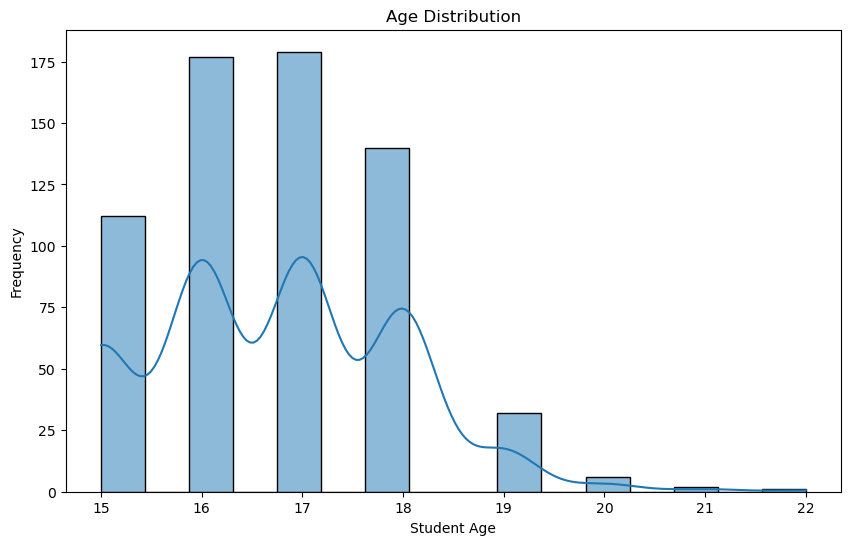

In [33]:
#Data Visualization

#Distribution plot for age 
plt.figure(figsize = (10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Student Age')
plt.ylabel('Frequency')
plt.show()

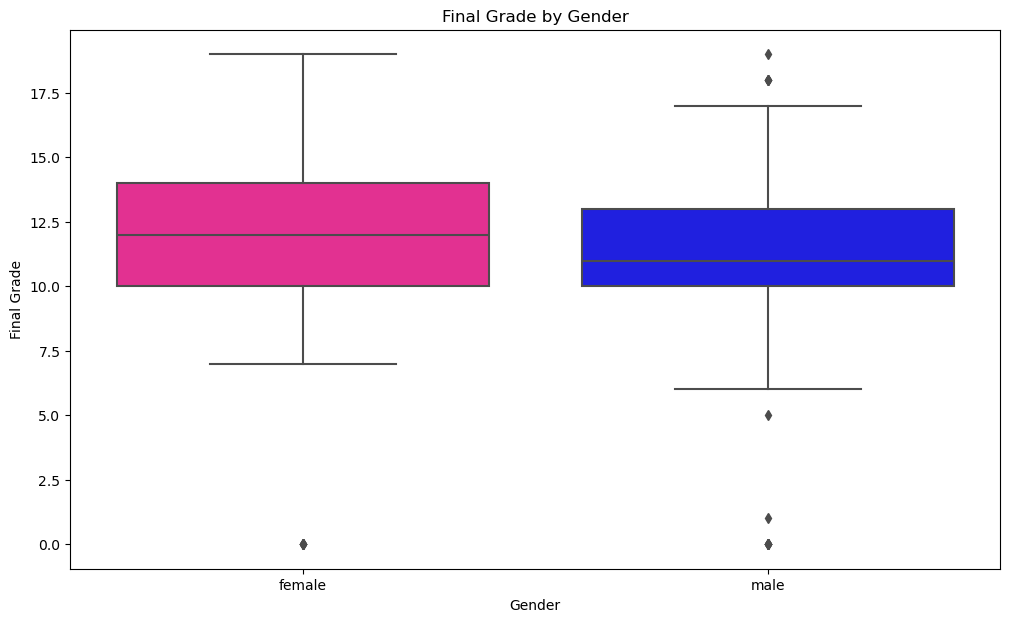

In [513]:
#Box Plot for Final Grade by Gender
plt.figure(figsize = (12,7))
sns.boxplot(x='gender', y='final_grade',data=df,palette={'female':'deeppink', 'male':'blue'})
plt.title('Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()

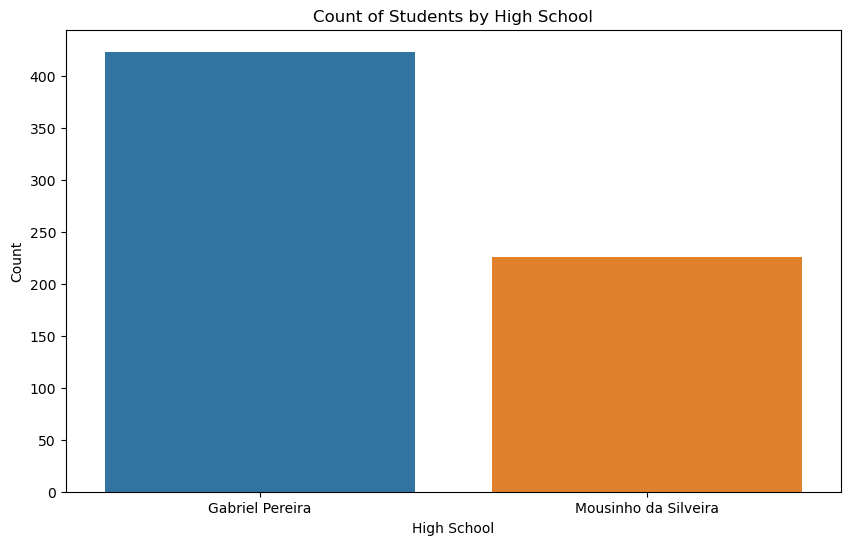

In [35]:
#Count plot for high school
plt.figure(figsize=(10, 6))
sns.countplot(x='high_school', data=df)
plt.title('Count of Students by High School')
plt.xlabel('High School')
plt.ylabel('Count')
plt.show()

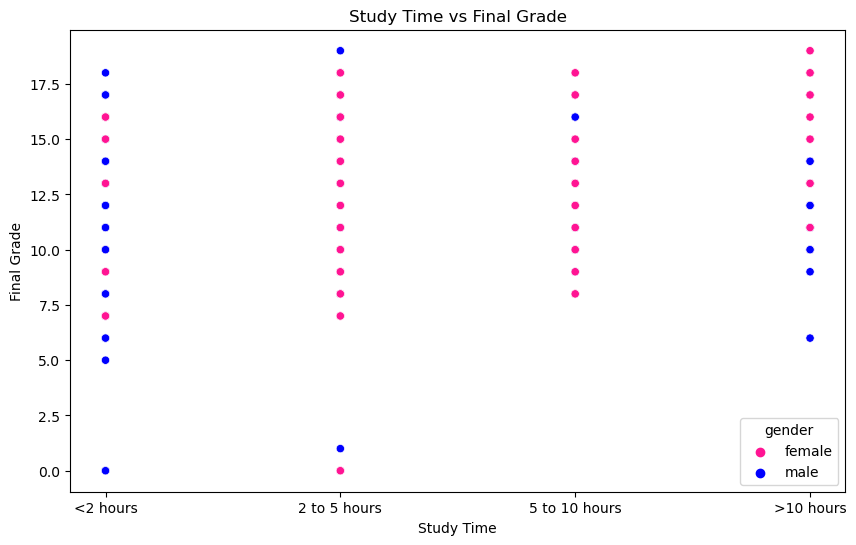

In [37]:
#Scatter plot for study time and grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='studytime', y='final_grade', data=df, hue='gender', palette={'female':'deeppink', 'male':'blue'})
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

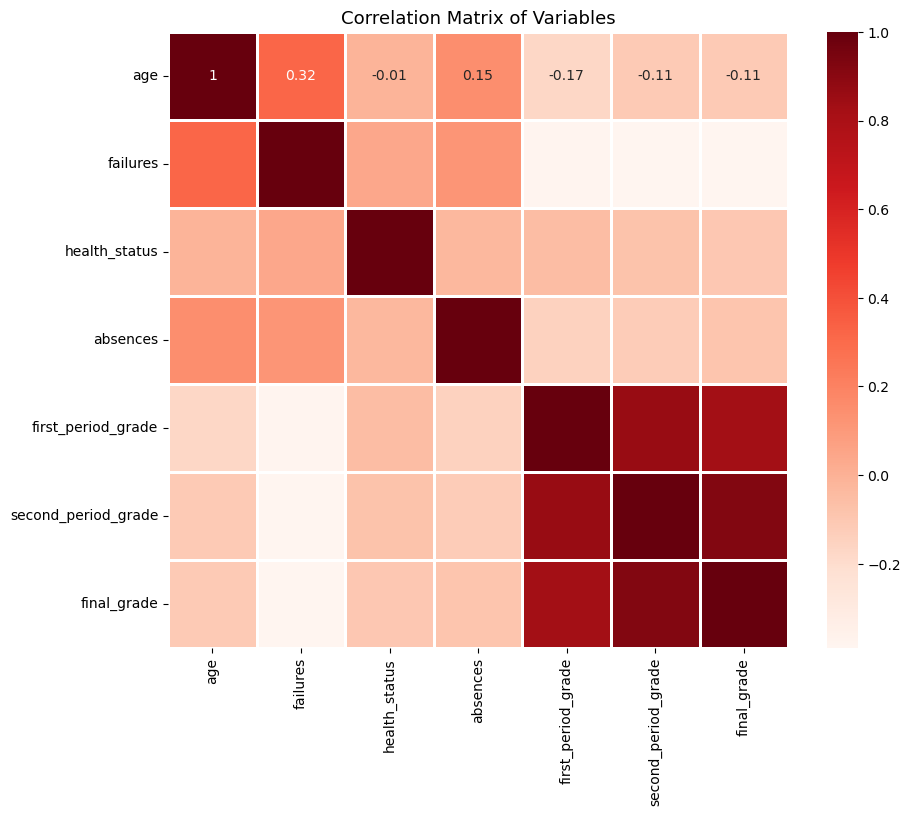

In [45]:
#Creating a correlation matrix
corr = df[['age', 'failures', 'health_status', 'absences', 'first_period_grade', 'second_period_grade', 'final_grade']].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Reds', linewidths=1)
plt.title('Correlation Matrix of Variables', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#First,second and final grade are highly correlated so we're gonna ignore other factors


In [55]:
#Building a prediction model
X = df[['first_period_grade', 'second_period_grade']]
y = df['final_grade']

In [57]:
#Spliiting the data into training and testing sets
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Creating and training the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
#Predicting on the test set
y_pred = model.predict(X_test)

In [73]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [77]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.37
R^2 Score: 0.86


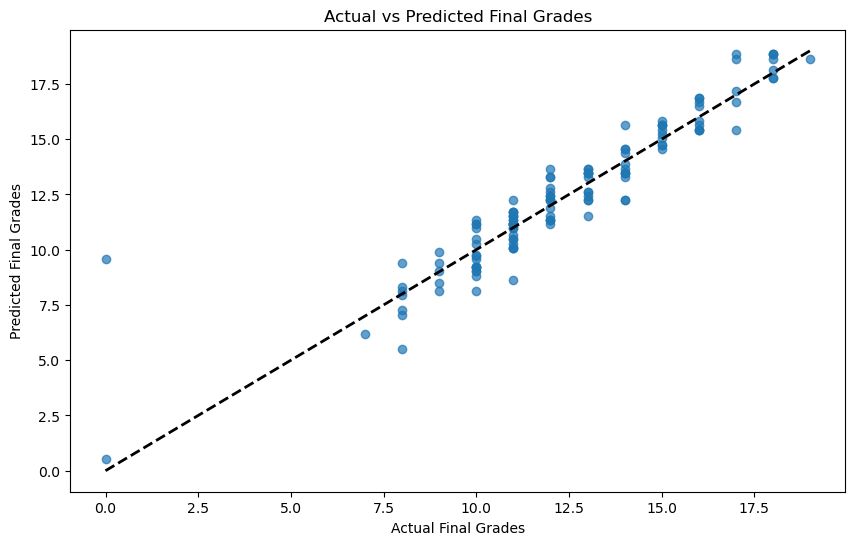

In [93]:
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Actual vs Predicted Final Grades')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()